In [6]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [7]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3212, grad_fn=<NllLossBackward>)


In [8]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Define the loss
criterion = nn.NLLLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our log-probabilities
logps = model(images)
# Calculate the loss with the logps and the labels
loss = criterion(logps, labels)

print(loss)

tensor(2.2971, grad_fn=<NllLossBackward>)


In [9]:
# Autograd ## automatically calculating the gradients of tensors
x = torch.randn(2,2, requires_grad=True)
print(x)

tensor([[ 0.5162,  0.1671],
        [-1.2171, -0.4844]], requires_grad=True)


In [10]:
# power operation `PowBackward0`.
y = x**2
print(y)

tensor([[0.2665, 0.0279],
        [1.4814, 0.2346]], grad_fn=<PowBackward0>)


In [11]:
## grad_fn shows the function that generated this variable
print(y.grad_fn)

In [12]:
# Reduce the tensor `y` to a scalar value
z = y.mean()
print(z)

tensor(0.5026, grad_fn=<MeanBackward0>)


In [14]:
# calculate the gradient for `z` with respect to `x`
z.backward()
print(x.grad)
print(x/2)

tensor([[ 0.2581,  0.0835],
        [-0.6086, -0.2422]])
tensor([[ 0.2581,  0.0835],
        [-0.6086, -0.2422]], grad_fn=<DivBackward0>)


In [15]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [16]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0011,  0.0011,  0.0011,  ...,  0.0011,  0.0011,  0.0011],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0053,  0.0053,  0.0053,  ...,  0.0053,  0.0053,  0.0053],
        ...,
        [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        [ 0.0013,  0.0013,  0.0013,  ...,  0.0013,  0.0013,  0.0013]])


In [17]:
## Training the network!
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [18]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0256, -0.0263, -0.0223,  ...,  0.0077,  0.0350, -0.0212],
        [ 0.0094, -0.0357,  0.0262,  ..., -0.0273,  0.0228, -0.0262],
        [ 0.0047,  0.0024, -0.0097,  ..., -0.0094, -0.0132, -0.0267],
        ...,
        [ 0.0161, -0.0078,  0.0267,  ..., -0.0236,  0.0238, -0.0336],
        [ 0.0171, -0.0302, -0.0075,  ...,  0.0072, -0.0272, -0.0315],
        [-0.0144, -0.0067, -0.0236,  ...,  0.0196, -0.0261,  0.0050]],
       requires_grad=True)
Gradient - tensor([[ 0.0037,  0.0037,  0.0037,  ...,  0.0037,  0.0037,  0.0037],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        ...,
        [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [-0.0037, -0.0037, -0.0037,  ..., -0.0037, -0.0037, -0.0037],
        [ 0.0018,  0.0018,  0.0018,  ...,  0.0018,  0.0018,  0.0018]])


In [19]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0256, -0.0264, -0.0223,  ...,  0.0076,  0.0350, -0.0212],
        [ 0.0094, -0.0357,  0.0262,  ..., -0.0273,  0.0228, -0.0262],
        [ 0.0047,  0.0024, -0.0097,  ..., -0.0094, -0.0132, -0.0267],
        ...,
        [ 0.0161, -0.0078,  0.0267,  ..., -0.0236,  0.0238, -0.0336],
        [ 0.0171, -0.0302, -0.0075,  ...,  0.0072, -0.0271, -0.0314],
        [-0.0144, -0.0067, -0.0236,  ...,  0.0196, -0.0261,  0.0050]],
       requires_grad=True)


## Training for real



In [20]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.86632367733445
Training loss: 0.8099173025281698
Training loss: 0.5146407449741099
Training loss: 0.4251621711546424
Training loss: 0.3820518504645524


With the network trained, we can check out it's predictions.

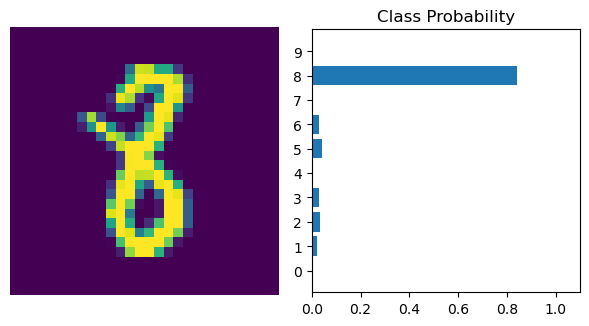

In [21]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)